## 1. 算法介绍

朴素贝叶斯是一种基于贝叶斯定理的分类算法,广泛应用于文本分类、垃圾邮件过滤、情感分析等领域。它是一种简单但非常有效的分类方法,特别适用于高维度特征空间的分类问题。

朴素贝叶斯分类器的"朴素"来源于它对特征之间独立性的假设。尽管这个假设在现实中往往不成立,但该算法在许多实际应用中仍然表现出色。

## 2. 算法原理

朴素贝叶斯分类器基于贝叶斯定理:

$P(A|B) = \frac{P(B|A) * P(A)}{P(B)}$

在分类问题中,我们关心的是给定特征$X$,类别$Y$的后验概率$P(Y|X)$:

$P(Y|X) = \frac{P(X|Y) * P(Y)}{P(X)}$

由于朴素贝叶斯假设特征之间相互独立,因此:

$P(X|Y) = P(X_1|Y) * P(X_2|Y) * ... * P(X_n|Y)$

分类时,我们选择使$P(Y|X)$最大的类别$Y$作为预测结果。

## 3. 案例分析

我们使用著名的鸢尾花(Iris)数据集来演示朴素贝叶斯分类器的应用。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 加载数据
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 创建并训练模型
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# 预测
y_pred = gnb.predict(X_test)

# 评估模型
accuracy = accuracy_score(y_test, y_pred)
print(f"准确率: {accuracy:.2f}")

print("\n分类报告:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


准确率: 0.98

分类报告:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



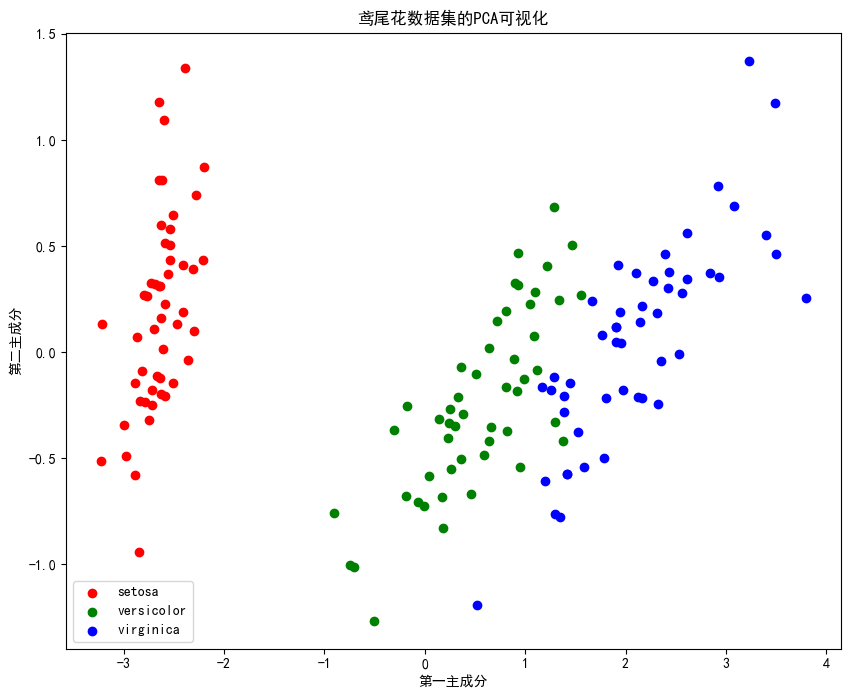

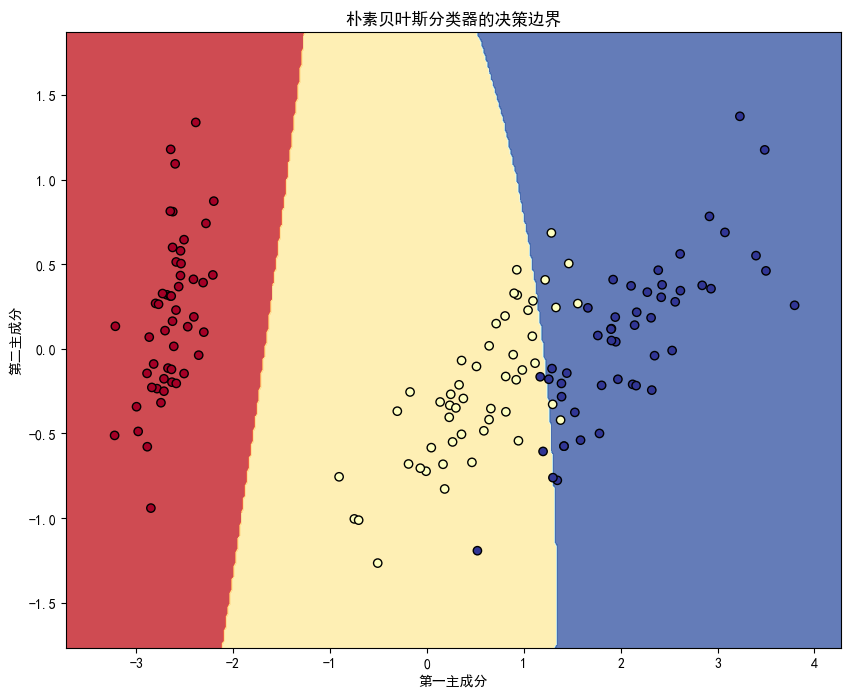

In [2]:
# 可视化
# 使用PCA降维到2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 绘制散点图
plt.figure(figsize=(10, 8))
colors = ['red', 'green', 'blue']
for i, c in zip(range(3), colors):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], c=c, label=iris.target_names[i])

plt.title('鸢尾花数据集的PCA可视化')
plt.xlabel('第一主成分')
plt.ylabel('第二主成分')
plt.legend()
plt.show()

# 绘制决策边界
x_min, x_max = X_pca[:, 0].min() - 0.5, X_pca[:, 0].max() + 0.5
y_min, y_max = X_pca[:, 1].min() - 0.5, X_pca[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = gnb.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black')
plt.title('朴素贝叶斯分类器的决策边界')
plt.xlabel('第一主成分')
plt.ylabel('第二主成分')
plt.show()